In [323]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from scipy.stats import skew
from matplotlib.colors import ListedColormap

In [324]:
#make_blobs(n_samples=500, centers=3, n_features=2,random_state=1, cluster_std = 2),

datasets = [
    make_blobs(n_samples=500, centers=3, n_features=2,random_state=1, cluster_std = 2),
    make_blobs(n_samples=500, centers=2, n_features=2,random_state=1, cluster_std = 2),
    make_moons(n_samples=500, noise=0.1, random_state=1),
    make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=1),
]

NUM = 3
X, y = datasets[NUM]

if NUM == 0:
    y = [0 if val == 0 else 1 for val in y]
# One hot
y = [ [1 if val == 0 else 0, 1 if val == 1 else 0] for val in y]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )


In [325]:
#classifier = MLPClassifier()
classifiers = [MLPClassifier(learning_rate_init = 10),
            RandomForestClassifier(),
            DecisionTreeClassifier(),
            KNeighborsClassifier(),]
classifier_names = ["MLP CLassifier", "Random Forest Classifier", "Decision Tree Classifier", "K Neighbors Classifier",]

In [326]:
import random

# Get MUBA data
X_muba = []
y_muba = []
alphas = []

for X, label in zip(X_test, y_test):

    index = np.where(X_test == X)[0][0]
    label=np.array(label)

    for j in range(200):

        diff_label = False
        while diff_label == False:
            new_index = random.randint(0,len(X_test)-1)
            new_label = np.array(y_test[new_index])
            if new_label[0] != label[0]:
                diff_label = True

        new_X = X_test[new_index]
        
        alpha = random.random()
        
        X_combined = (alpha * X) + ((1-alpha) * new_X)
        y_combined = (alpha * label) + ((1-alpha) * new_label)
        
        X_muba.append(X_combined)
        y_muba.append(y_combined)
        alphas.append(y_combined[0])
    
X_muba = np.array(X_muba)
y_muba = np.array(y_muba)
# Alpha represents the percentage of Group 1



Text(0, 0.5, 'Y Values')

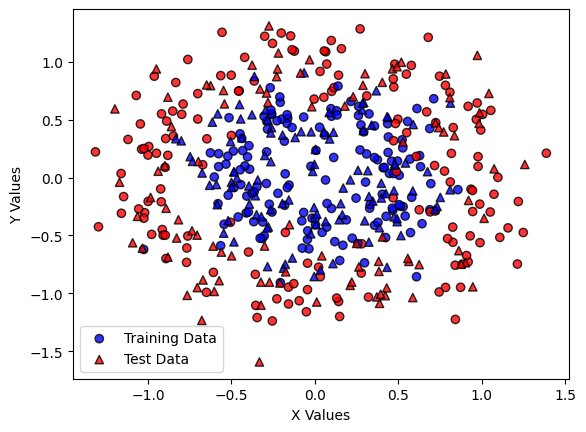

In [327]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = ListedColormap(['Blue','Red']), alpha = 0.8, edgecolor = "black", label = "Training Data") 
plt.scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = ListedColormap(['Blue','Red']), alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^")
plt.legend()
plt.xlabel("X Values")
plt.ylabel("Y Values")

Text(0.5, 0, 'Proportion Red')

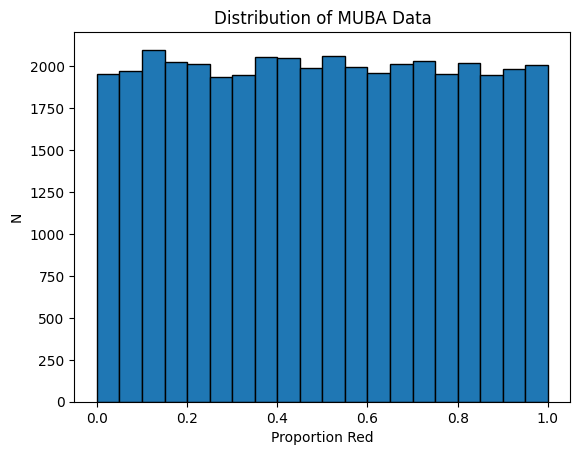

In [328]:
plt.hist(alphas,bins=[i * 0.05 for i in range(21)], edgecolor = "k")
plt.title("Distribution of MUBA Data")
plt.ylabel("N")
plt.xlabel("Proportion Red")

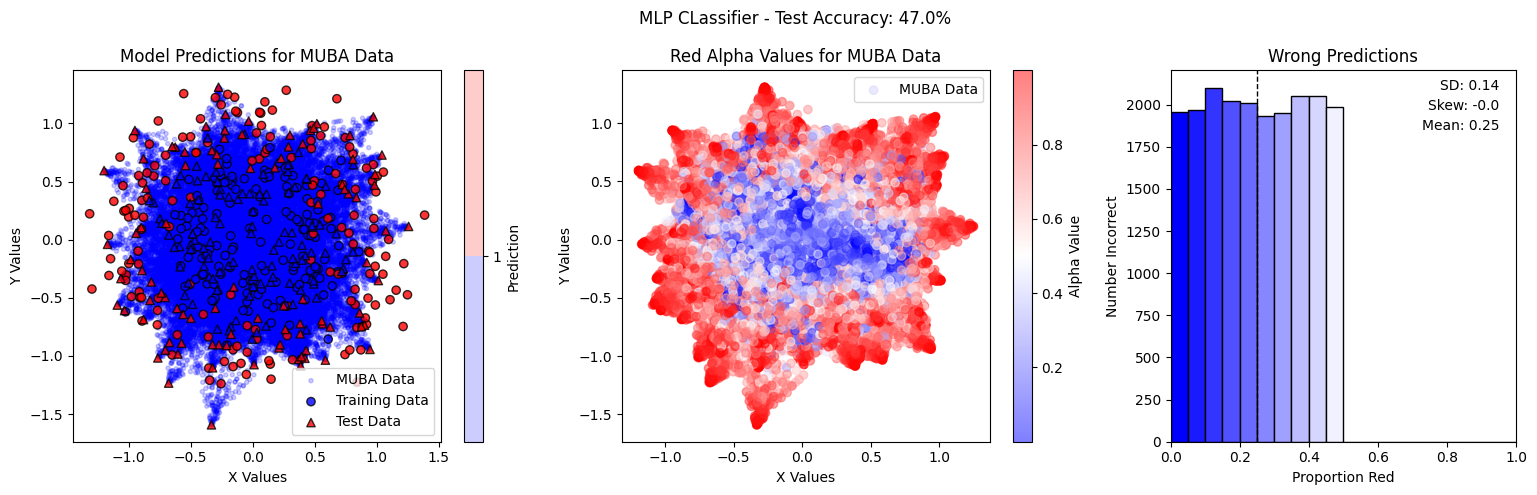

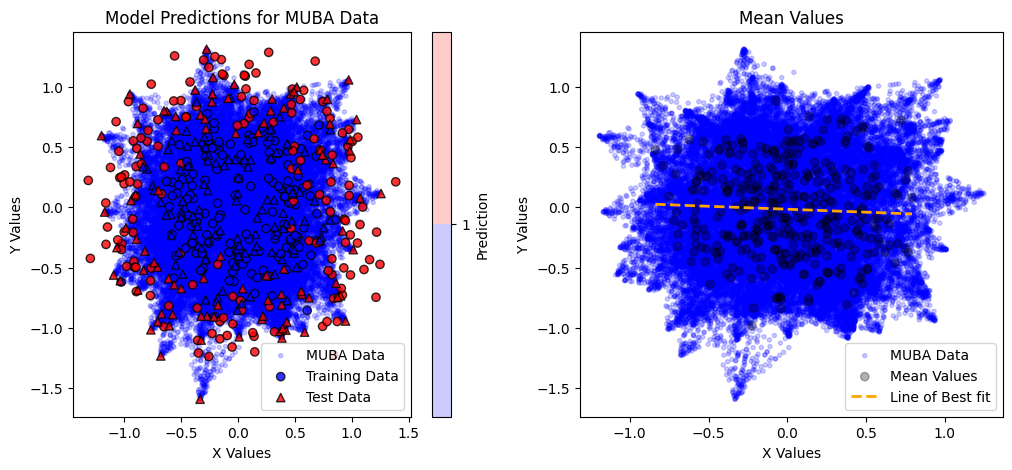

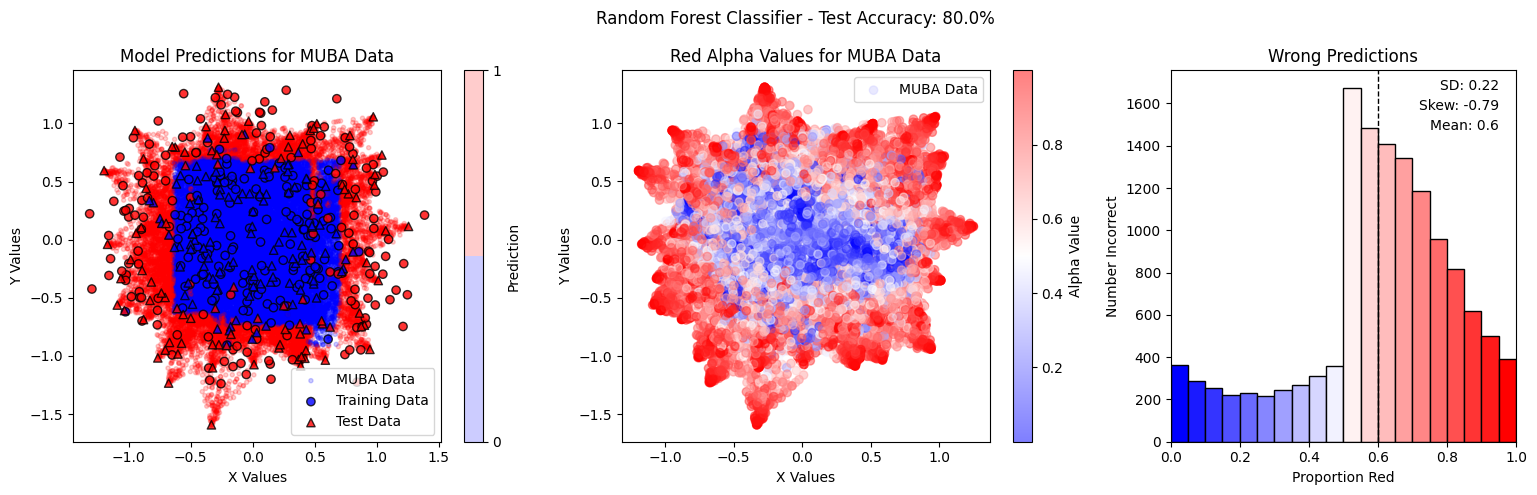

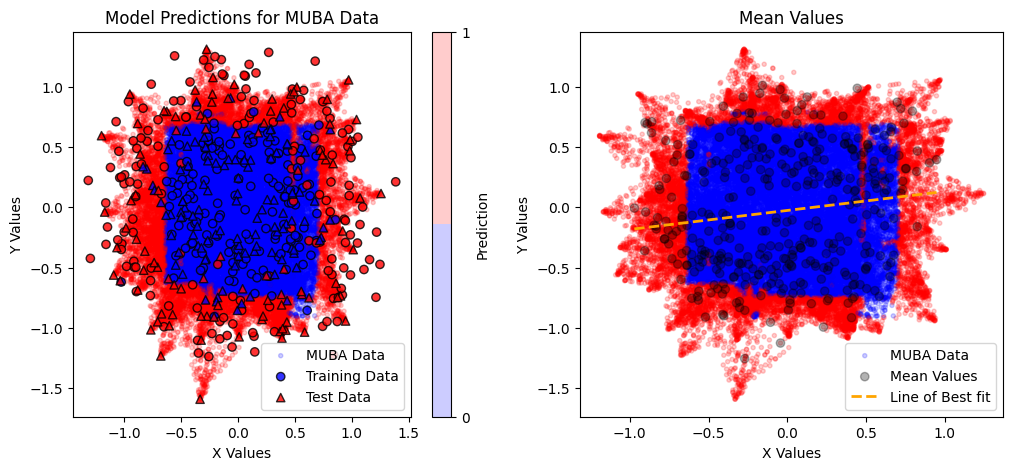

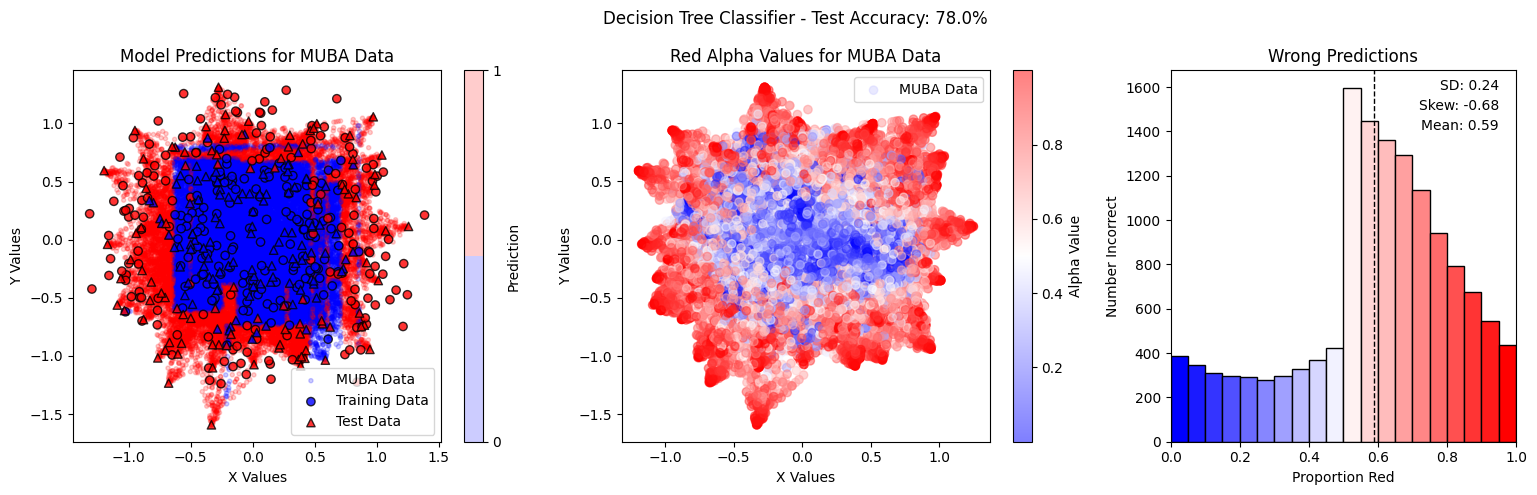

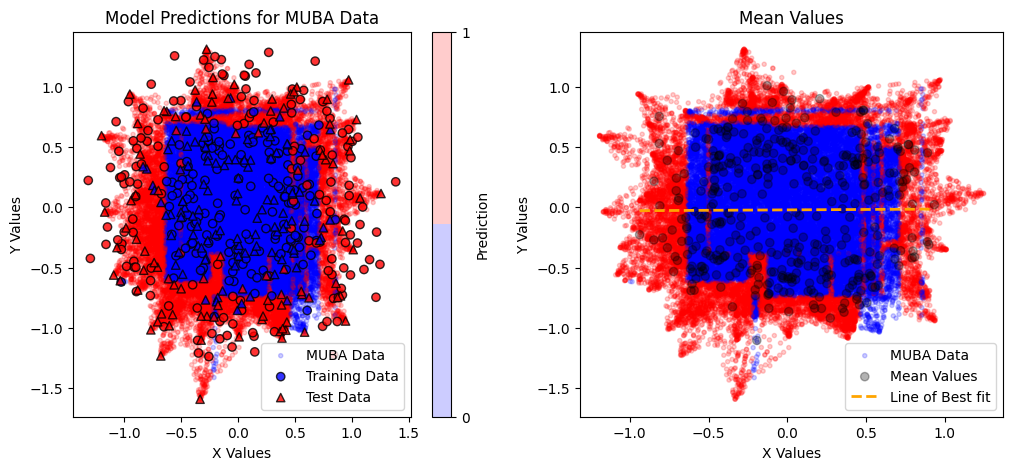

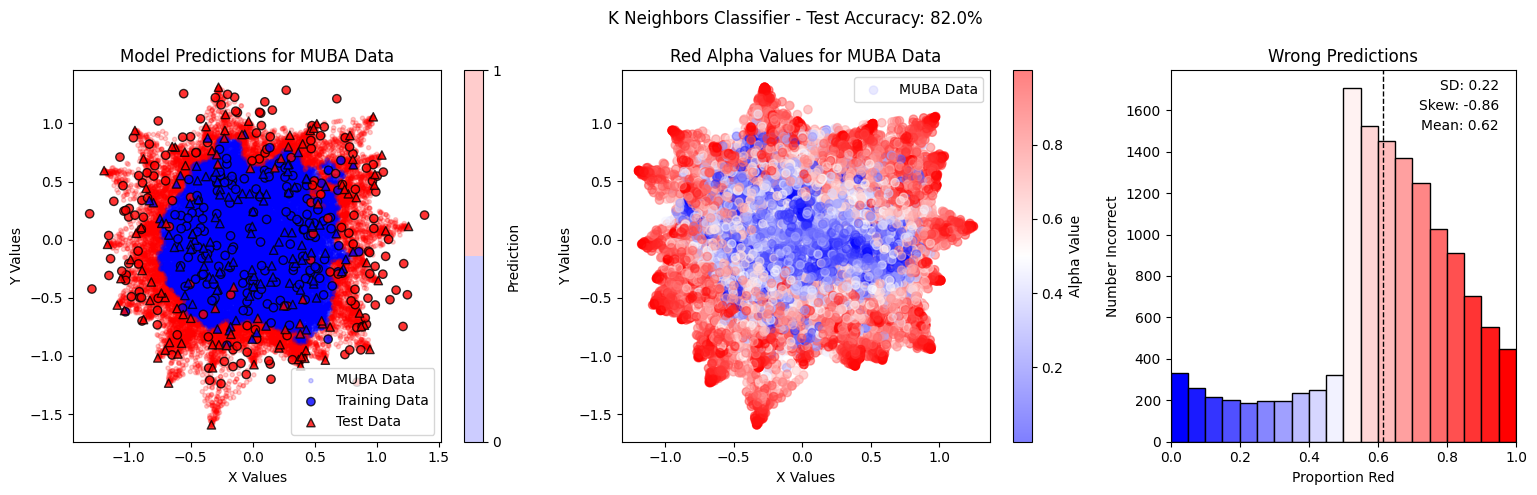

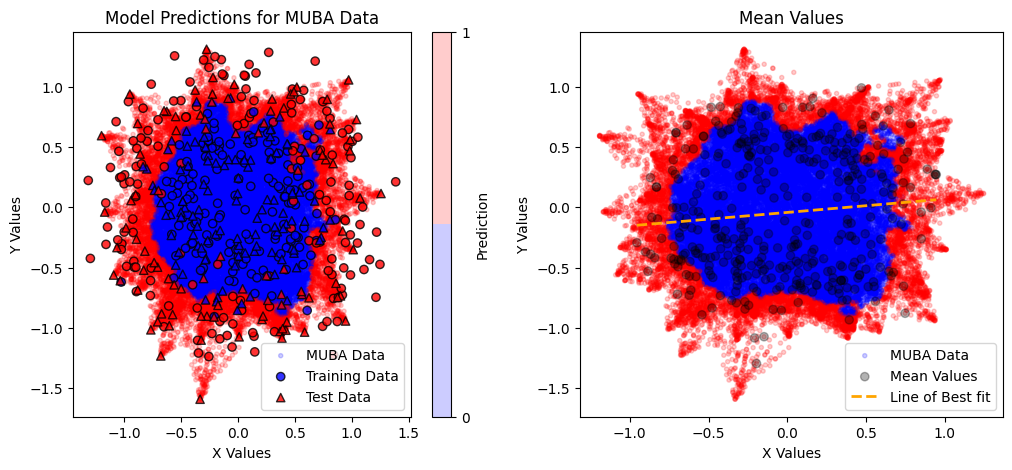

In [329]:


for classifier, name in zip(classifiers, classifier_names):
        
    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    predictions = classifier.predict(X_muba)

    incorrect_alphas = []

    for pred, y, alpha in zip(predictions, y_muba, alphas):
        if pred[0] != round(y[0]): #incorrect
            incorrect_alphas.append(alpha)

    cm = plt.cm.bwr
    cm_discrete = ListedColormap(['Blue','Red'])

    fig, axs = plt.subplots(nrows =1, ncols = 3, gridspec_kw={'width_ratios': [2, 2, 1.5]}, figsize = (16,5))

    y = axs[0].scatter(X_muba[:, 0], X_muba[:, 1], c =  [i[0] for i in predictions], cmap = cm_discrete, alpha = 0.2, label = "MUBA Data", marker = '.')
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Training Data") 
    axs[0].scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^") # Red for Group 1
    axs[0].legend()
    axs[0].set_xlabel("X Values")
    axs[0].set_ylabel("Y Values")
    axs[0].set_title("Model Predictions for MUBA Data")

    fig.colorbar(y, label = "Prediction", ticks = [0,1])
    

    x = axs[1].scatter(X_muba[:, 0], X_muba[:, 1], c = alphas, alpha = 0.5, label = "MUBA Data", cmap = cm)
    axs[1].set_xlabel("X Values")
    axs[1].set_ylabel("Y Values")
    axs[1].legend()
    fig.colorbar(x, label = "Alpha Value")
    axs[1].set_title("Red Alpha Values for MUBA Data")


    n, bins, patches = axs[2].hist(incorrect_alphas,bins=[i * 0.05 for i in range(21)], edgecolor = "k")
    axs[2].set_xlim(0,1)
    axs[2].set_xlabel("Proportion Red")
    axs[2].set_ylabel("Number Incorrect")
    axs[2].set_title("Wrong Predictions")
    axs[2].axvline(np.mean(incorrect_alphas), color='k', linestyle='dashed', linewidth=1)
    axs[2].text(0.94,0.82,f"SD: {round(np.std(incorrect_alphas),2)}",transform=plt.gcf().transFigure, horizontalalignment = "right")
    axs[2].text(0.94,0.78,f"Skew: {round(skew(incorrect_alphas),2)}",transform=plt.gcf().transFigure, horizontalalignment = "right")
    axs[2].text(0.94,0.74,f"Mean: {round(np.mean(incorrect_alphas),2)}",transform=plt.gcf().transFigure, horizontalalignment = "right")

    # scale values to interval [0,1]
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    fig.suptitle(f"{name} - Test Accuracy: {round(score*100,1)}%")
    fig.subplots_adjust(top=0.8)
    fig.tight_layout()
    
    plt.show()

# Plot 2

    fig, axs = plt.subplots(nrows =1, ncols = 2, gridspec_kw={'width_ratios': [2, 2]}, figsize = (12,5))

    y = axs[0].scatter(X_muba[:, 0], X_muba[:, 1], c =  [i[0] for i in predictions], cmap = cm_discrete, alpha = 0.2, label = "MUBA Data", marker = '.')
    axs[0].scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Training Data") 
    axs[0].scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^") # Red for Group 1
    axs[0].legend()
    axs[0].set_xlabel("X Values")
    axs[0].set_ylabel("Y Values")
    axs[0].set_title("Model Predictions for MUBA Data")
    fig.colorbar(y, label = "Prediction", ticks = [0,1])

    mean = np.mean(incorrect_alphas)

    mean_values = []
    mean_colours = []
    for alpha, X in zip(alphas, X_muba):

        # Round alpha to 1, 2, 3
        alpha1 = round(alpha,1)

        if round(alpha,2) == round(mean,2): # Strong Equal
            mean_values.append(X)
            mean_colours.append("black")

    mean_values = np.array(mean_values)
    fit = np.polyfit(mean_values[:, 0], mean_values[:, 1], 1)
    min_x = np.min(mean_values[:, 0])
    min_y = fit[0] * min_x + fit[1]
    max_x = np.max(mean_values[:, 0])
    max_y = fit[0] * max_x + fit[1]

    axs[1].scatter(X_muba[:, 0], X_muba[:, 1],c =  [i[0] for i in predictions], cmap = cm_discrete, alpha = 0.2, label = "MUBA Data", marker = '.')
    axs[1].scatter(mean_values[:, 0], mean_values[:, 1], c =  mean_colours, alpha = 0.3, label = "Mean Values", marker = 'o', edgecolor = "black" )
    axs[1].plot([min_x,max_x],[min_y,max_y], color = "orange", linestyle = "--", label = "Line of Best fit", linewidth = 2)
    axs[1].legend()
    axs[1].set_xlabel("X Values")
    axs[1].set_ylabel("Y Values")

    axs[1].set_title("Mean Values")
    plt.show()

Text(0.5, 1.0, 'Mean Values')

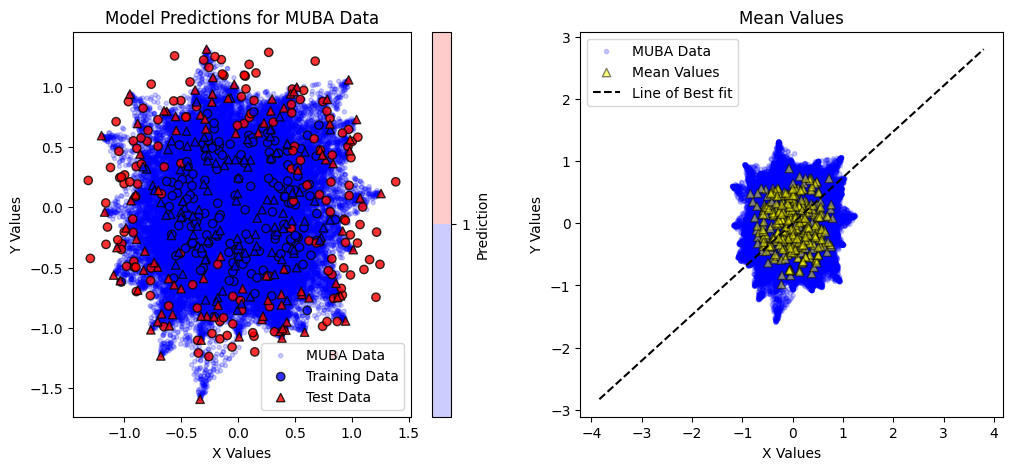

In [330]:
# Mean analysis

classifier = classifiers[0]

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_muba)

incorrect_alphas = []

for pred, y, alpha in zip(predictions, y_muba, alphas):
    if pred[0] != round(y[0]): #incorrect
        incorrect_alphas.append(alpha)

fig, axs = plt.subplots(nrows =1, ncols = 2, gridspec_kw={'width_ratios': [2, 2]}, figsize = (12,5))

y = axs[0].scatter(X_muba[:, 0], X_muba[:, 1], c =  [i[0] for i in predictions], cmap = cm_discrete, alpha = 0.2, label = "MUBA Data", marker = '.')
axs[0].scatter(X_train[:, 0], X_train[:, 1], c = [i[0] for i in y_train], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Training Data") 
axs[0].scatter(X_test[:, 0], X_test[:, 1], c = [i[0] for i in y_test], cmap = cm, alpha = 0.8, edgecolor = "black", label = "Test Data", marker = "^") # Red for Group 1
axs[0].legend()
axs[0].set_xlabel("X Values")
axs[0].set_ylabel("Y Values")
axs[0].set_title("Model Predictions for MUBA Data")
fig.colorbar(y, label = "Prediction", ticks = [0,1])

mean = np.mean(incorrect_alphas)

mean_values = []
mean_colours = []
for alpha, X in zip(alphas, X_muba):

    # Round alpha to 1, 2, 3
    alpha1 = round(alpha,1)

    if round(alpha,2) == round(mean,2): # Strong Equal
        mean_values.append(X)
        mean_colours.append("yellow")

mean_values = np.array(mean_values)
fit = np.polyfit(mean_values[:, 0], mean_values[:, 1], 1)
min_x = np.min(mean_values[:, 0])
min_y = fit[0] * min_x + fit[1]
max_x = np.max(mean_values[:, 0]) 
max_y = fit[0] * max_x + fit[1]


axs[1].scatter(X_muba[:, 0], X_muba[:, 1],c =  [i[0] for i in predictions], cmap = cm_discrete, alpha = 0.2, label = "MUBA Data", marker = '.')
axs[1].scatter(mean_values[:, 0], mean_values[:, 1], c =  mean_colours, alpha = 0.5, label = "Mean Values", marker = '^', edgecolor = "black" )
axs[1].plot([min_x,max_x],[min_y,max_y], color = "black", linestyle = "--", label = "Line of Best fit")
axs[1].legend()
axs[1].set_xlabel("X Values")
axs[1].set_ylabel("Y Values")

axs[1].set_title("Mean Values")


In [331]:
# X, y = datasets[1]
# classifier = classifiers[0]

# accuracy_list = []
# SD_list = []
# skew_list = []
# mean_list = []

# for i in range(300):
    
#     classifier.fit(X_train, y_train)

#     accuracy_list.append(classifier.score(X_test, y_test))
    
#     predictions = classifier.predict(X_muba)

#     for pred, y, alpha in zip(predictions, y_muba, alphas):
#         if pred[0] != round(y[0]): #incorrect
#             incorrect_alphas.append(alpha)

#     SD_list.append(np.std(incorrect_alphas))
#     skew_list.append(skew(incorrect_alphas))
#     mean_list.append(np.mean(incorrect_alphas))

    

In [332]:
# fig, axs = plt.subplots(nrows =1, ncols = 3, gridspec_kw={'width_ratios': [1,1,1]}, figsize = (16,5))

# axs[0].scatter(SD_list,accuracy_list)
# axs[0].set_xlabel("Standard Deviation")
# axs[0].set_ylabel("Test Accuracy")

# axs[1].scatter(skew_list,accuracy_list)
# axs[1].set_xlabel("Skew")
# axs[1].set_ylabel("Test Accuracy")

# axs[2].scatter(mean_list,accuracy_list)
# axs[2].set_xlabel("Mean")
# axs[2].set_ylabel("Test Accuracy")